In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
from xpinyin import Pinyin
import re 
import sys 
# sys.path.append('/Users/elaineye/data_science/teochew_nlp/src/')
from pinyin_utils import extract_pinyin_tones

In [2]:
data = pd.read_csv("../clean_data/teochew-bai-clean-data.txt", names=['teochew', 'word'], sep='-')

In [3]:
def replace_tilde(tones):
    tones = tones.strip() 
    return tones.replace('~', 'n')

data['teochew'] = data['teochew'].apply(replace_tilde)
data.word = data.word.apply(lambda x: x.strip())

### converted word to pinyin 

In [4]:
p = Pinyin()
data['mandarin'] = data['word'].apply(lambda x: p.get_pinyin(x, tone_marks='numbers'))
data.head()

,teochew,word,mandarin
0,ua52,我,wo3
1,le52,你,ni3
2,i3,他,ta1
3,eui21,会,hui4
4,da5,说,shuo1


In [5]:
data['teochew_length'] = data.teochew.apply(lambda x: len(x.split()))
data['word_length'] = data.word.apply(lambda x: len(x))
data2 = data[data.teochew_length == data.word_length]

In [6]:
def extract_teochew_tones(input_teochew):
    return "".join([c for c in input_teochew if not c.isalpha()])

In [7]:
# split the teochew/mandarin tones
pd_word = pd.DataFrame(data2.word.apply(lambda x: list(x)[-1]))
pd_teochew = pd.DataFrame(data2.teochew.apply(lambda x: x.split(' ')[-1]))
pd_mandarin = pd.DataFrame(data2.mandarin.apply(lambda x: x.split('-')[-1]))

pd_word = pd_word.explode('word')
pd_teochew = pd_teochew.explode('teochew')
pd_mandarin = pd_mandarin.explode('mandarin')

pd_teochew['teochew_tone'] = pd_teochew.teochew.apply(extract_teochew_tones)
pd_mandarin['mandarin_tone'] = pd_mandarin.mandarin.apply(lambda x: list(x)[-1])
                           
combined_data = pd.concat([pd_word, pd_teochew, pd_mandarin], axis=1)
combined_data.drop_duplicates(subset='word', keep='first', inplace=True)
print(combined_data.loc[combined_data['mandarin_tone']=='5'])

   word teochew teochew_tone mandarin mandarin_tone
23    的    gai1            1      de5             5
28    吗   bue35           35      ma5             5
29    么    gai5            5      me5             5
49    了   lyo52           52      le5             5


In [8]:
teochew_tone = combined_data['teochew_tone'].values.tolist()
mandarin_tone = combined_data['mandarin_tone'].values.tolist()

Text(0.5,1,'teochew tones countplot')

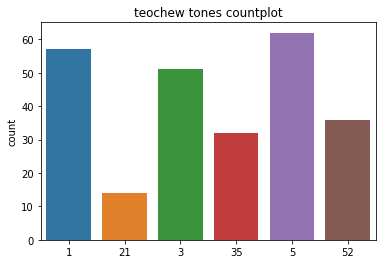

In [9]:
teochew_tone = np.array(teochew_tone) 
sns.countplot(teochew_tone).set_title("teochew tones countplot")

Text(0.5,1,'mandarin tones countplot')

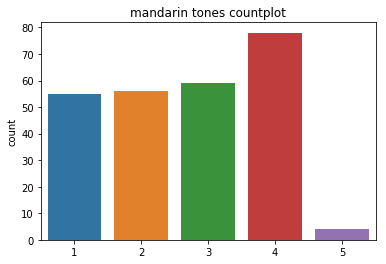

In [10]:
mandarin_tone = np.array(mandarin_tone) 
sns.countplot(mandarin_tone).set_title("mandarin tones countplot")

In [11]:
from collections import Counter 
c = Counter(zip(teochew_tone, mandarin_tone))
nc = Counter(el for el in c.elements() if c[el] >= 10)
print(nc.values())

dict_values([25, 30, 13, 23, 29, 15, 12, 17, 15, 14, 13])


### Histogram of Teochew and Manderin Tones 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

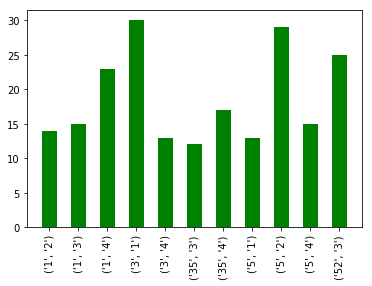

In [13]:
plt.bar([str(k) for k in (nc.keys())], nc.values(), width=0.5, color='g')
plt.xticks(rotation='vertical')
plt.show()